# Res Bridge Analysis
Date: 12 October 2020<br>
Stephen Shaw<br>
WAG - 4wireAC card development

In [1]:
%matplotlib inline
import sympy as sym
import numpy as np
import scipy as sp
from numpy import pi #lets you type pi for 3.14159
import matplotlib.pyplot as plt
from scipy import odr #for ODR method
from astropy.io import ascii #lets you import CSV data
from sympy import symbols, diff
plt.style.use('default')

In [4]:
Ractual = np.array([1, 2.2, 4.7, 6, 10, 22, 33, 47, 68, 100])
RactualERR = Ractual * 0.05

Rmeasured = np.array([0.552, 0.56, 2.3, 2.6, 5.215, 11.5, 17, 23.7, 33.95, 48.75])
RmeasuredERR = Rmeasured * 0.01

In [5]:
#Here we define the fit function and parameters to be defined by fit
def linear(p,A0):
    A1 = p[0]*A0 + p[1]
    return A1

#next we make the fitfunction a model that odr can read
model1 = odr.Model(linear)

#define data set for data fit
data1 = odr.RealData(Ractual,Rmeasured, sx=RactualERR , sy=RmeasuredERR)

#initial parameter guess, equal to # of p[]s in model, indexed based on p[] value
initial = np.array([1.,0.])

#define odr fit with data set, model equation, and initial conditions guess
odrfit1 = odr.ODR(data1,model1, beta0=initial)

#Tell it to Run ODR
results1 = odrfit1.run()
#Print Results
results1.pprint()

Beta: [ 0.50285364 -0.06118662]
Beta Std Error: [0.03601045 0.09892737]
Beta Covariance: [[ 0.00010143 -0.00016136]
 [-0.00016136  0.00076553]]
Residual Variance: 12.784123636464138
Inverse Condition #: 0.029884348369643557
Reason(s) for Halting:
  Sum of squares convergence


Text(0.565, 0.04, '$Fit (m, b) :  (0.503 \\pm 0.036, -0.06 \\pm 0.10)$')

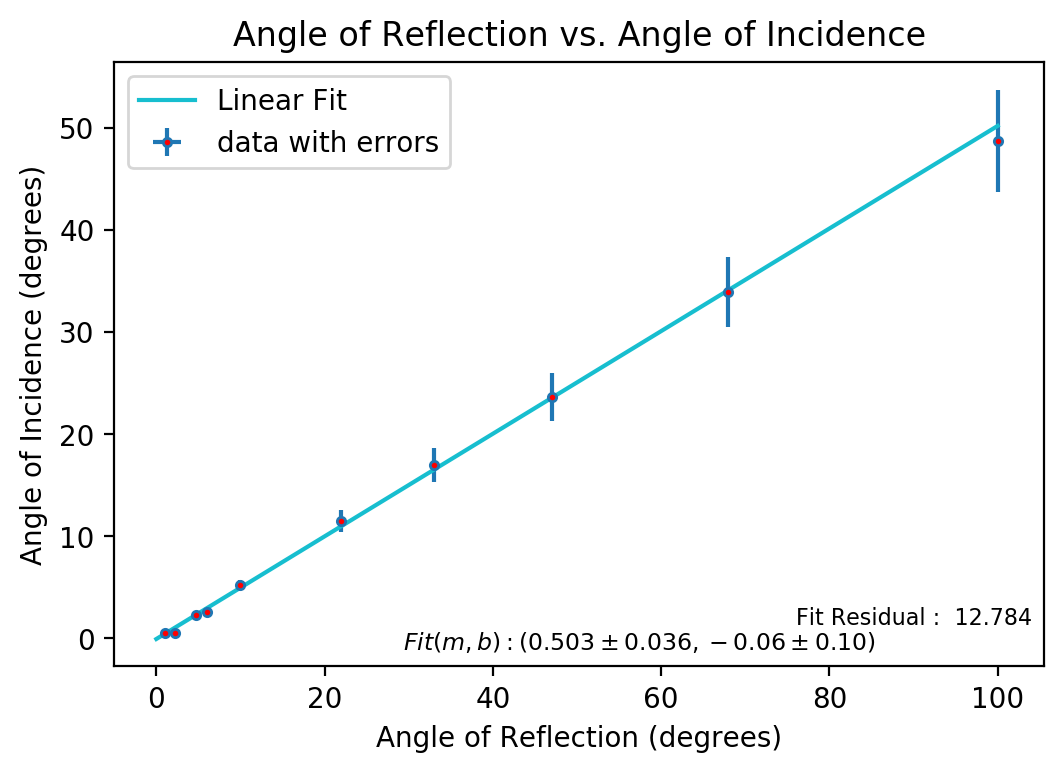

In [6]:
#Now lets plot ther results
fake_reflection = np.linspace(0, Ractual.max(), 100) #make a range of xvalues to use with the fit function

fig,ax=plt.subplots(dpi=200)
ax.errorbar(Ractual, Rmeasured, RactualERR, RmeasuredERR, label='data with errors',fmt= ".", markerfacecolor="red") #plot of the data with error bars
ax.plot(fake_reflection, linear(results1.beta, fake_reflection),"r-",label='Linear Fit', color='C9') # Plot of the fit



# Legend the plot
ax.set_title("Angle of Reflection vs. Angle of Incidence")
ax.set_xlabel(r"Angle of Reflection (degrees)")
ax.set_ylabel(r"Angle of Incidence (degrees)")
ax.legend(loc='upper left')


ax.text(0.86, 0.08,
         'Fit Residual :  %.3f' %(results1.res_var),
         fontsize=8,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)


ax.text(0.565, 0.04,
         r'$Fit (m, b) :  (%.3f \pm %.3f, %.2f \pm %.2f)$' %(results1.beta[0], results1.sd_beta[0],results1.beta[1], results1.sd_beta[1]),
         fontsize=8.5,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)



